## Analyzing Used Car Listings on eBay Kleinanzeigen

We will be working on a dataset of used cars from *eBay Kleinanzeigen*, a [classifieds](https://en.wikipedia.org/wiki/Classified_advertising) section of the German eBay website.

The dataset was originally scraped and uploaded to [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data).  The version of the dataset we are working with is a sample of 50,000 data points that was prepared by [Dataquest](https://www.dataquest.io) including simulating a less-cleaned version of the data.

The data dictionary provided with data is as follows:

- `dateCrawled` - When this ad was first crawled. All field-values are taken from this date.
- `name` - Name of the car.
- `seller` - Whether the seller is private or a dealer.
- `offerType` - The type of listing
- `price` - The price on the ad to sell the car.
- `abtest` - Whether the listing is included in an A/B test.
- `vehicleType` - The vehicle Type.
- `yearOfRegistration` - The year in which which year the car was first registered.
- `gearbox` - The transmission type.
- `powerPS` - The power of the car in PS.
- `model` - The car model name.
- `kilometer` - How many kilometers the car has driven.
- `monthOfRegistration` - The month in which which year the car was first registered.
- `fuelType` - What type of fuel the car uses.
- `brand` - The brand of the car.
- `notRepairedDamage` - If the car has a damage which is not yet repaired.
- `dateCreated` - The date on which the eBay listing was created.
- `nrOfPictures` - The number of pictures in the ad.
- `postalCode` - The postal code for the location of the vehicle.
- `lastSeenOnline` - When the crawler saw this ad last online.


The aim of this project is to clean the data and analyze the included used car listings, especially car prices and how branding and mileage affect them

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading in the autos dataset and displaying it
autos = pd.read_csv("autos.csv", encoding = "latin1")
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [3]:
#displaying the dataset info and top 5 records
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


On first look we can see that as expected the most number of samples in the dataset is 5000 with 20 different columns. There are 15 object type classes and 5 integer type classes. Here we can conclude that there are some integer columns stored as objects for example "price". To perform data analysis, we need to make sure we change as many columns that contain numeric values into integer types. There are also some columns that have null values but as no column has null values more than 20%, it's still considered accurate enough to perform calculations.

# Data Cleaning

Data cleaning is a critical step in the data analysis. This is to ensure that data is accurate, complete and reliable to give the most effective models and insight.

A few ways Data cleaning helps perform analysis and gives better inisght is by:
- Improving data quality through accuracy, consistency and completeness
- Enhancing analysis by producing reliable results and reducing bias
- Efficiency through faster processing and simplified data integration

### Data Cleaing - Renaming Columns


The first thing we must do is clean the data and we will start by renaming the columns to more apt descriptions and change them to snakecase as this format is the standard python convention.

In [4]:
#Displaying the inital columns to understand the dataframes structure

autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
new_columns = [
    "date_crawled",           # Date of when the ad was first created
    "name",                   # Name of the car
    "seller",                 # Seller type (priveate or dealer)
    "offer_type",             # Type of listing
    "price",                  # Selling price of the car
    "abtest",                 # A/B test inclusion statis
    "vehicle_type",            # Type of vehicle
    "registration_year",     # Year of car registration
    "gearbox",                # Type of transmission
    "power_ps",               # Car's Power in PS
    "model",                  # Car model name
    "odometer",               # Kilometers deiven by the car
    "registration_month",     # Month of car registration
    "fuel_type",              # Type of fuel used by the car
    "brand",                  # Brand of the car
    "unrepaired_damage",      # Unrepaired damage status
    "ad_created",             # Date when ad was created
    "num_of_pictures",        # Number of pictures in the ad
    "postal_code",            # Postal code for the car's location
    "last_seen"               # Last time the ad was seen online
]
    
# Assign the new column to the Dataframe
autos.columns = new_columns

In [6]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


As you can see we have renamed the columns to give them a snakecase format and more descriptive titles. The reason we have done this is to ensure consistency and readability for our dataframe. This can lead to a better understanding a therfore a better analysis for not only myself but for future data scientist wanting to perform further analysis.


### Data Cleaning - Exploration

Here we will display the categorical and numeric columns to start our initial exploration of the dataframe and see what we find

In [7]:
autos.describe(include = "all")

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-19 17:36:18,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


#### Inital Observations from Dataset Description

**Columns with Mostly One Value:**

- seller: The 'seller' column predominantly contains the value 'privat' with only one entry out of 50,000 not being that value.
- offer_type: Similar to 'seller'.
- num_of_pictures: The 'num_of_pictures' max and min value is 0 and it has no unique values and so we can conclude that every posting has no pictures posted

For these reasons we can drop these columns

**Columns Needing More Investigation**
- price: The 'Price' column has a lot of unique values and a high frequency of certain entries. We need to investigate this further for potential outliers and unusual entries
- registration_year: This column spans from 1000 to 9999, indicating incorrect or outlier data. Possibly data in the incorrect format. This column must be examined and cleaned
- power_ps: A wide range of values could indicate outliers and incorrect data points 


**Numeric Data Stored as Text**
- price
- odometer



In [8]:
#removing the redundant columns
autos = autos.drop(["seller","offer_type","num_of_pictures"], axis =1 )

In [9]:
autos.head()

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


As you can see these columns have been removed

**Changing numeric data to a numeric dtype**

As the dtype is an object for the numeric data, we cannot perform mathematical analysis on things stored as objects as python doesnt recognise it as numbers. So first we must remove non-integer characters and change its dtype. First we will explore these columns by displaying the top 5 records to understand how the information was inputted.

In [10]:
autos["price"].head()

0    $5,000
1    $8,500
2    $8,990
3    $4,350
4    $1,350
Name: price, dtype: object

In [11]:
autos["odometer"].head()

0    150,000km
1    150,000km
2     70,000km
3     70,000km
4    150,000km
Name: odometer, dtype: object

For price we need to remove the dollar sign, for odometer we need to remove the 'km' and the commas for both before changing it to numeric dtypes. We then should rename the 'odometer' column to 'odometer_km' so we know what units of measurement we are working in.

In [12]:
#Remove the currency symbol and commas from the 'price' column before converting it to an integer

autos['price'] = autos['price'].str.replace("$","")  # Remove dollar sign
autos["price"] = autos["price"].str.replace(",","")  # Remove commas
autos["price"] = autos["price"].astype(int)          # Convert to integer

In [13]:
#Remove 'km' and commas from the 'odometer' column and convert to integer

autos["odometer"] = autos["odometer"].str.replace("km","")  # Remove 'km'
autos["odometer"] = autos["odometer"].str.replace(",","")   # Remove commas
autos["odometer"] = autos["odometer"].astype(int)           # Convert to integer

In [14]:
# Rename the 'odometer' column to 'odometer_km' for consistency

autos.rename({"odometer": "odometer_km"}, axis = 1, inplace = True) # Renaming the column


In [15]:
autos["price"].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int64

In [16]:
autos["odometer_km"].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int64

As we can see from above, the updated columns are classified as dtype "int64" after removing the non-integer characters. The odometer column is also renamed

#### Exploring the Odometer and Price Columns

To explore these data columns we will analyze them using their minimum and maximum values to look for any values that look unrealistically high or low (outliers) that we might want to remove.

In [17]:
#finds the shape of the odometer column
print(autos["odometer_km"].unique().shape)

#printing the frequency of each value that shows up in the data column
autos["odometer_km"].value_counts()

(13,)


odometer_km
150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: count, dtype: int64

We see that most of the cars listed have a higher mileage than a low one indicating that most of the cars have been used a lot. Furthermore the fact the values are rounded suggests that there was a predetermined set of options to choose from when anserring this question

In [18]:
# describes the odometer column mathematically

autos["odometer_km"].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [19]:
#prints the shape of the price series
print(autos["price"].unique().shape)

#displays the unqiue values of the price series
print(autos["price"].value_counts().head(20))

(2357,)
price
0       1421
500      781
1500     734
2500     643
1000     639
1200     639
600      531
800      498
3500     498
2000     460
999      434
750      433
900      420
650      419
850      410
700      395
4500     394
300      384
2200     382
950      379
Name: count, dtype: int64


On the first look, the prices are rounded which again can suggest that there were price options to choose from. However because there is 2357 unique values and by common logic, it's more reasonable to believe that this is just peoples tendancies to round price to the nearest 10.

We can also see that around 1.5% of the data have 0 listed as the price. Normally we can consider removing these rows but we will keep them to see if there is some analysis we can do . The maximum price was also stated to be 1 million. This is also highly unlikely so we will explore both low and high end price listings.

In [20]:
#displays a descending order of price listings

autos["price"].value_counts().sort_index(ascending = False).head(20)

price
99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: count, dtype: int64

In [21]:
#displays an ascending list of price listings

autos["price"].value_counts().sort_index(ascending = True).head(20)

price
0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: count, dtype: int64

We can see there are both unusually high and low price listings for the dataset. As this is a bidding website the low end pricing can be legitimate however the higher end ones over a million seem to be more unrealistic as these cars are unlikely to be sold through ebay. Again we can consider removing these rows upon further inspection

In [22]:
# displays the type of vehicles listed at $0

autos[autos['price'] == 0]['vehicle_type'].value_counts()

vehicle_type
limousine     256
kleinwagen    237
kombi         194
coupe          71
bus            61
cabrio         45
andere         30
suv            21
Name: count, dtype: int64

In [23]:
# displays the type of vehicle brands listed at $0

autos[autos['price'] == 0]['brand'].value_counts()

brand
volkswagen        348
opel              183
bmw               154
audi              115
ford               95
mercedes_benz      81
renault            79
sonstige_autos     72
fiat               45
peugeot            26
seat               21
mazda              18
volvo              17
citroen            14
nissan             13
chrysler           12
honda              11
kia                11
trabant            10
alfa_romeo          8
chevrolet           8
porsche             7
suzuki              7
smart               7
mitsubishi          7
daihatsu            6
mini                6
skoda               6
toyota              6
subaru              6
hyundai             5
rover               4
jaguar              3
daewoo              3
lada                2
jeep                2
lancia              2
saab                1
Name: count, dtype: int64

In [24]:
## displays the type of vehicle damage listed at $0

autos[autos['price'] == 0]['unrepaired_damage'].value_counts()

unrepaired_damage
nein    450
ja      249
Name: count, dtype: int64

As we can see there isn't any real logical reason as to why these listings are so low, as there seems to be  a lot of expensive branded cars and vehicle types with no damage. So for now we will look only at cars listed above $1. 

In [25]:
# displays the type of vehicles and price listed above $351,000

autos[autos['price'] > 351000][['vehicle_type',"price"]].value_counts()

vehicle_type  price   
bus           999999      1
coupe         1300000     1
              3890000     1
              10000000    1
kombi         999999      1
              1234566     1
limousine     999990      1
              11111111    1
              12345678    1
              27322222    1
              99999999    1
Name: count, dtype: int64

In [26]:
# displays the brand of vehicle and price listed above $351,000

autos[autos['price'] > 351000][['brand',"price"]].value_counts()

brand           price   
bmw             1234566     1
citroen         27322222    1
fiat            12345678    1
ford            999999      1
                11111111    1
mercedes_benz   99999999    1
opel            12345678    1
sonstige_autos  1300000     1
                3890000     1
                10000000    1
volkswagen      999990      1
                999999      1
                11111111    1
volvo           12345678    1
Name: count, dtype: int64

In [27]:
# displays the type of vehicle damage and price listed above $351,000

autos[autos['price'] > 351000][['unrepaired_damage',"price"]].value_counts()

unrepaired_damage  price   
nein               12345678    2
                   999999      1
ja                 999990      1
nein               1300000     1
                   3890000     1
                   10000000    1
                   11111111    1
Name: count, dtype: int64

Here we decided to analysis on price listings above \\$351,000. I chose this value as when we looked at the descending price list, there seemed to be a regular order between price points until \\$350,000 where it jumped erratically.

Looking at it, these seem to be outliers as they are all different brands -both high end and low end- of different vehicle types all listed at prices so different from each other. There was also one with damage listed at a extremely high price

So now I will consider records with price listings between\\$1 and \\$351,000 

In [28]:
#only keeps records between the wanted price range

cleaned_autos = autos[autos["price"].between(1,351000)]

#mathematically describes the new dataframe

cleaned_autos.describe()

,price,registration_year,power_ps,odometer_km,registration_month,postal_code
count,48565.000000,48565.000000,48565.000000,48565.000000,48565.000000,48565.000000
mean,5888.935591,2004.755421,117.197158,125770.101925,5.782251,50975.745207
std,9059.854754,88.643887,200.649618,39788.636804,3.685595,25746.968398
min,1.000000,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1200.000000,1999.000000,71.000000,125000.000000,3.000000,30657.000000
50%,3000.000000,2004.000000,107.000000,150000.000000,6.000000,49716.000000
75%,7490.000000,2008.000000,150.000000,150000.000000,9.000000,71665.000000
max,350000.000000,9999.000000,17700.000000,150000.000000,12.000000,99998.000000


Here we can see that the new dataframe we have cleaned has retained over 96% of the original data whilst not considering outliers and anomolys that may skew analysis down the line. Already we can see things sunch as how the standard listing is around \\$6000. 

### Exploring the Date columns 

There are 5 columns that should contain date values and these are:

- `date_crawled`
- `registration_month`
- `registration_year`
- `ad_created`
- `last_seen`

The columns 'date_crawled', 'last_seen' and 'ad_created' are all identified as string columns by pandas. So the first things we need to do is convert the data into a numerical representation so we can understand it quantitatively.

The first thing we should look at is how these string columns are formatted.

In [29]:
#printing the columns to understand structure and formatt
cleaned_autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


We can see that we only need the first 10 characters for the date which also only have nunmerical quantities. So we will extract only the date

In [30]:
date_crawled_distribution = cleaned_autos["date_crawled"].str[:10].value_counts(normalize = True , dropna = False).sort_index()

print(date_crawled_distribution)

date_crawled
2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: proportion, dtype: float64


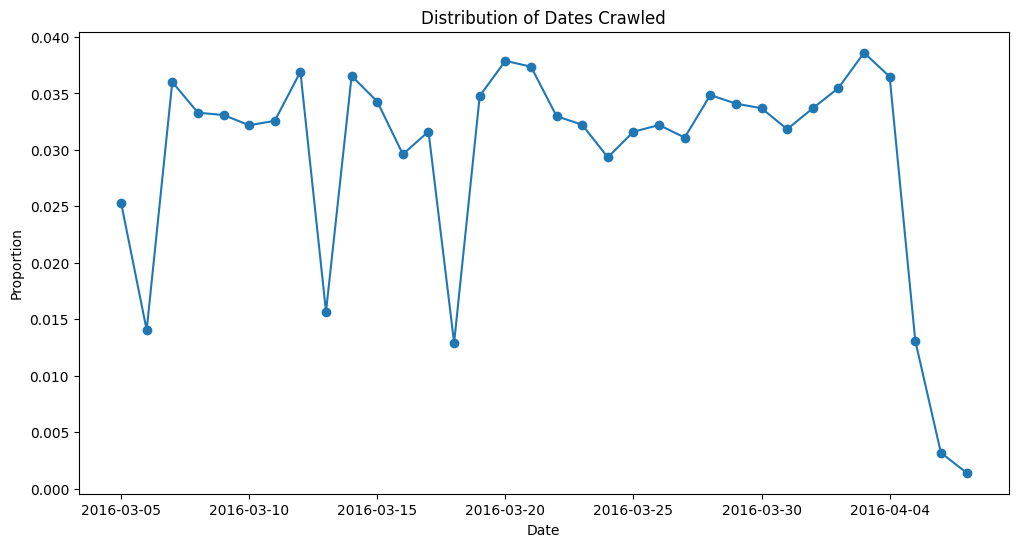

In [31]:
# Plot the distribution as a line graph
date_crawled_distribution.plot(kind='line', figsize=(12, 6), marker='o')

# Adding title and labels
plt.title('Distribution of Dates Crawled')
plt.xlabel('Date')
plt.ylabel('Proportion')

# Show the plot
plt.show()

In [32]:
ad_created_distribution = cleaned_autos["ad_created"].str[:10].value_counts(normalize = True , dropna = False).sort_index()

print(ad_created_distribution)

ad_created
2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: proportion, Length: 76, dtype: float64


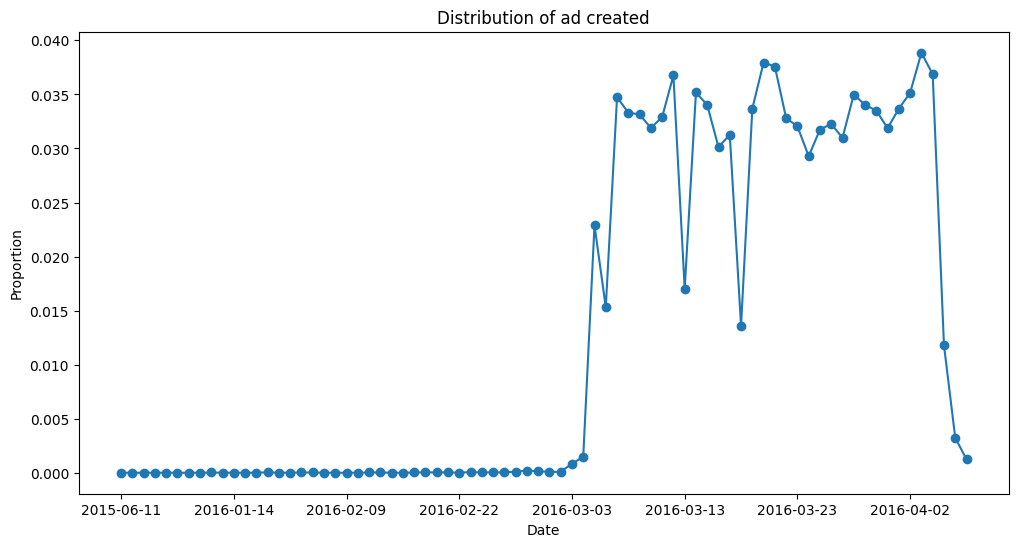

In [33]:
# Plot the distribution as a line graph
ad_created_distribution.plot(kind='line', figsize=(12, 6), marker='o')

# Adding title and labels
plt.title('Distribution of ad created')
plt.xlabel('Date')
plt.ylabel('Proportion')

# Show the plot
plt.show()

In [34]:
last_seen_distribution = cleaned_autos["last_seen"].str[:10].value_counts(normalize = True , dropna = False).sort_index()

print(last_seen_distribution)

last_seen
2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: proportion, dtype: float64


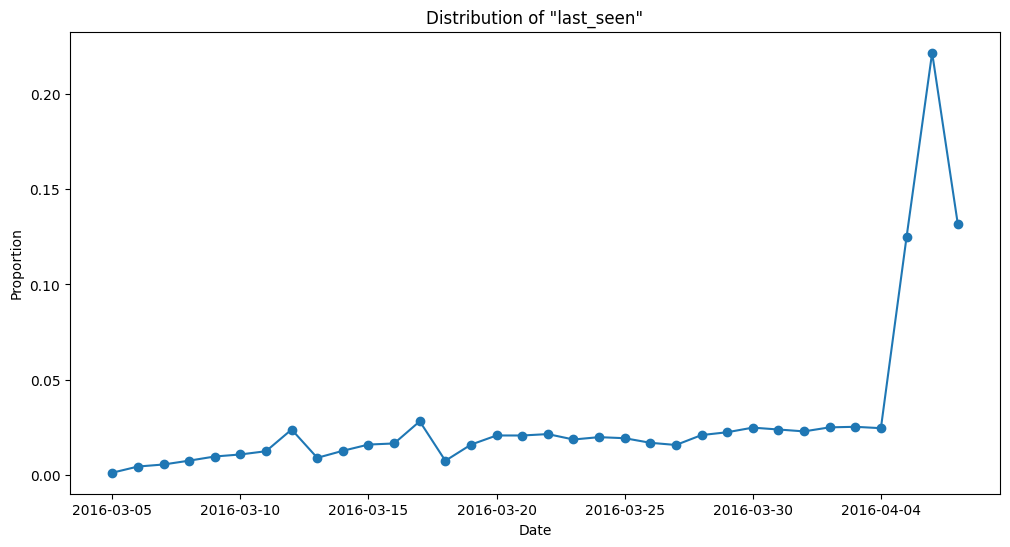

In [35]:
# Plot the distribution as a line graph
last_seen_distribution.plot(kind='line', figsize=(12, 6), marker='o')

# Adding title and labels
plt.title('Distribution of "last_seen"')
plt.xlabel('Date')
plt.ylabel('Proportion')

# Show the plot
plt.show()

Here we can see the distributions on a graph of when the ads were created, crawled and last seen by the crawler. We can infer many things frmo these graphs, for example in,

**Date Crawled -** We can see that the crawler has taken listings daily over a 1 month period. It seems to have crawled the same amount over this time period apart from a few days where it seemed to have crawled less.

**Ad Created -** Here the graph tells us how there was a spike in ads created around March 2016. This can be a good indicator on the sites popularity and daily users. Like Date crawled it saw a ragular amount of postings apart from a few off days.

**Last seen -** The crawler tells us the date where a listing was last seen. It says that many of the listings were last seen during the last three days. Whilst some of these could be because a car was sold, the disproportionate amount of 'last seen' values could be because the crawling period ended.




In [36]:
#get a mathematical description of the series 'registration year'

cleaned_autos["registration_year"].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

The year the car was first registered helps us get an idea of how old the car is. As you can see it says the oldest car was made in the ywar 1000 and the newest car in the year 9999. We can tell these values are incorrect as cars werent made back then and we have surpassed the year 9999.

### Data Cleaning - Dealing with Incorrect Registration Year Data

A car cannot be first registered after the listing was seen,  so any vehicle with a registration year above 2016 is definetly an incorrect value. Determining the earliest valid year however is more difficult. Realisticcally we expect it to be somewhere in the first few decades of the 1900's. We will count the number of listings that that fall outside of the 1900's - 2016 interval and investigate if its safe to remove these listings

In [37]:
#finds the percentage of records that dont fall between our desired range

print(((~cleaned_autos["registration_year"].between(1900,2016)).sum()/cleaned_autos.shape[0]))

0.038793369710697


We can see that the amount of records that dont fall between our time range is less than 4% of our total dataset and so we can remove these without it affecting the overall trend of the dataset.

In [38]:
#finds the proportion of cars registered during a certain year

cleaned_autos = cleaned_autos[cleaned_autos["registration_year"].between(1900,2016)]
cleaned_autos["registration_year"].value_counts(normalize = True).head(10)                                                        

registration_year
2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
Name: proportion, dtype: float64

We can see that the most amount of cars registered were in the last 25 years.

### Exploring Price by Brand

We are now going to explore the brands column to see how the price changes according ro different brands. We will do this by using agregation and finding the mean of a certain number of brands in the dataset. We will consider the top 20 brands or brands that contribute over 5% of the total values


In [39]:
#finds how big a proportion a brand takes from the data

cleaned_autos["brand"].value_counts(normalize=True)

brand
volkswagen        0.211264
bmw               0.110045
opel              0.107581
mercedes_benz     0.096463
audi              0.086566
ford              0.069900
renault           0.047150
peugeot           0.029841
fiat              0.025642
seat              0.018273
skoda             0.016409
nissan            0.015274
mazda             0.015188
smart             0.014160
citroen           0.014010
toyota            0.012703
hyundai           0.010025
sonstige_autos    0.009811
volvo             0.009147
mini              0.008762
mitsubishi        0.008226
honda             0.007840
kia               0.007069
alfa_romeo        0.006641
porsche           0.006127
suzuki            0.005934
chevrolet         0.005698
chrysler          0.003513
dacia             0.002635
daihatsu          0.002506
jeep              0.002271
subaru            0.002142
land_rover        0.002099
saab              0.001649
jaguar            0.001564
daewoo            0.001500
trabant           0.00

In [40]:
#prints the brands with a contribution above 5%

brand_counts = cleaned_autos["brand"].value_counts(normalize = True)
common_brands = brand_counts[brand_counts > .05].index
print(common_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object', name='brand')


From the displays above, we can see the proportion that each brand has over the dataset, and most of the listings are dominated by german brands. We can see that by using a threshold of 5% we can capture a lot of the meaningfull data but we wont include a lot of the other brands included in the data. The brands we would capture is

- **Volkswagen**
- **BMW**
- **opel**
- **Mercendez Benz**
- **audi**
- **ford**

In [41]:
#prints the top 20 brands

top_20_brands = brand_counts.index[:20]
print(top_20_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'skoda', 'nissan', 'mazda', 'smart',
       'citroen', 'toyota', 'hyundai', 'sonstige_autos', 'volvo', 'mini'],
      dtype='object', name='brand')


By using the top 20 brands, it would be more inclusive but the overall effect it had on the analysis wouldn't be meaningfull as there are many brands who contribute around 1% or even less to the data. One of the main things we could miss out on was potential outliers for the overall trend. So for this reason we will only perform analysis to the brands that have above 5% of the listings


In [42]:
#creates a dictionary and aggregates brand and prices

brand_mean_prices = {}

for brand in common_brands:
    brand_only = cleaned_autos[cleaned_autos["brand"] == brand]
    mean_price = brand_only["price"].mean()
    brand_mean_prices[brand] = int(mean_price)

brand_mean_prices


{'volkswagen': 5402,
 'bmw': 8332,
 'opel': 2975,
 'mercedes_benz': 8628,
 'audi': 9336,
 'ford': 3749}

As we can expect, Audi, BMW and Mercedes Benz on average have the most exepensive cars, with volkswagen trailing behind by a little and ford and opel being the cheapest cars on the market. The reasons for these averages can most likely be attributed to the brand and is a good indicator for people to understand what cars to buy depending on your budget.

We will now also see if there is link between car price and mileage. Whilst we can print out the data for each there is a few limitations for doing this with how the data is currently formatted. They are:

- it's difficult to compare more than two aggregate series objects if we want to extend to more columns

- we can't compare more than a few rows from each series object

- we can only sort by the index (brand name) of both series objects so we can easily make visual comparisons

So to get around this we will get both data series into their own dataframe.

### Exploring Mileage

In [43]:
#puts the aggrageted data into a series then dataframe

bmp_series = pd.Series(brand_mean_prices)
pd.DataFrame(bmp_series, columns=["mean_price"])

,mean_price
volkswagen,5402
bmw,8332
opel,2975
mercedes_benz,8628
audi,9336
ford,3749


In [44]:
##creates a dictionary and aggregates brand and mileage

brand_mean_mileage = {}

for brand in common_brands:
    brand_only = cleaned_autos[cleaned_autos["brand"] == brand]
    mean_mileage = brand_only["odometer_km"].mean()
    brand_mean_mileage[brand] = int(mean_mileage)
    
brand_mean_mileage

{'volkswagen': 128707,
 'bmw': 132572,
 'opel': 129310,
 'mercedes_benz': 130788,
 'audi': 129157,
 'ford': 124266}

In [45]:
#puts the aggregated milage data into a series then dataframe

bmm_series = pd.Series(brand_mean_mileage)
pd.DataFrame(bmm_series, columns=["mean_mileage"])

,mean_mileage
volkswagen,128707
bmw,132572
opel,129310
mercedes_benz,130788
audi,129157
ford,124266


In [46]:
#sorts the mileage data into descending order and reprints the information

mean_mileage = pd.Series(brand_mean_mileage).sort_values(ascending=False)
mean_prices = pd.Series(brand_mean_prices).sort_values(ascending=False)

brand_info = pd.DataFrame(mean_mileage,columns = ["Mean Mileage"])
brand_info

,Mean Mileage
bmw,132572
mercedes_benz,130788
opel,129310
audi,129157
volkswagen,128707
ford,124266


In [47]:
#adds on the prices column to the dataframe

brand_info["Mean Price"] = mean_prices
brand_info

,Mean Mileage,Mean Price
bmw,132572,8332
mercedes_benz,130788,8628
opel,129310,2975
audi,129157,9336
volkswagen,128707,5402
ford,124266,3749


The range of car mileages does not vary as much as the prices do by brand, instead all falling within 10% for the top brands.  There is a slight trend to the more expensive vehicles having higher mileage, with the less expensive vehicles having lower mileage.